In [0]:
sales = spark.read.csv("dbfs:/FileStore/sales.csv", header=True, inferSchema=True)
pd = spark.read.csv("dbfs:/FileStore/products.csv", header=True, inferSchema=True)

In [0]:
sales.show()

+----------+-----------+-------------------+--------+----------+--------+
|Product Id|Customer Id|               Date|Location|    Source|Quantity|
+----------+-----------+-------------------+--------+----------+--------+
|         1|          A|2023-01-01 00:00:00|   India|    Swiggy|       1|
|         2|          A|2022-01-01 00:00:00|   India|    Swiggy|       2|
|         2|          A|2023-01-07 00:00:00|   India|    Swiggy|       3|
|         3|          A|2023-01-10 00:00:00|   India|Restaurant|       1|
|         3|          A|2022-01-11 00:00:00|   India|    Swiggy|       1|
|         3|          A|2023-01-11 00:00:00|   India|Restaurant|       3|
|         2|          B|2022-02-01 00:00:00|   India|    Swiggy|       2|
|         2|          B|2023-01-02 00:00:00|   India|    Swiggy|       5|
|         1|          B|2023-01-04 00:00:00|   India|Restaurant|       2|
|         1|          B|2023-02-11 00:00:00|   India|    Swiggy|       7|
|         3|          B|2023-01-16 00:

In [0]:
pd.show()

+----------+------------+-------------+
|Product Id|Product Name|Product Price|
+----------+------------+-------------+
|         1|       PIZZA|          100|
|         2|     Chowmin|          150|
|         3|    sandwich|          120|
|         4|        Dosa|          110|
|         5|     Biryani|           80|
|         6|       Pasta|          180|
+----------+------------+-------------+



In [0]:
from pyspark.sql import SparkSession
joined_data = sales.join(pd, 'Product Id', how='inner')
joined_data.show()
joined_data.persist()


+----------+-----------+-------------------+--------+----------+--------+------------+-------------+
|Product Id|Customer Id|               Date|Location|    Source|Quantity|Product Name|Product Price|
+----------+-----------+-------------------+--------+----------+--------+------------+-------------+
|         1|          A|2023-01-01 00:00:00|   India|    Swiggy|       1|       PIZZA|          100|
|         2|          A|2022-01-01 00:00:00|   India|    Swiggy|       2|     Chowmin|          150|
|         2|          A|2023-01-07 00:00:00|   India|    Swiggy|       3|     Chowmin|          150|
|         3|          A|2023-01-10 00:00:00|   India|Restaurant|       1|    sandwich|          120|
|         3|          A|2022-01-11 00:00:00|   India|    Swiggy|       1|    sandwich|          120|
|         3|          A|2023-01-11 00:00:00|   India|Restaurant|       3|    sandwich|          120|
|         2|          B|2022-02-01 00:00:00|   India|    Swiggy|       2|     Chowmin|     

In [0]:
grouped_cust=joined_data.groupBy('Customer ID')

grouped_cust_count = grouped_cust.count()

grouped_cust_count.show()

#simply calling groupBy() doesn't compute any result yet. It just prepares the DataFrame for further operations that you might want to perform within each group. No transformation before action Concept is applied here(lazy evalautaion)


+-----------+-----+
|Customer ID|count|
+-----------+-----+
|          E|   18|
|          B|   36|
|          D|   12|
|          C|   18|
|          A|   33|
+-----------+-----+



In [0]:
#col: The col function is used to reference DataFrame columns by name. It returns a Column object representing the column specified by the input string. This allows you to perform various operations on DataFrame columns, such as arithmetic operations, filtering, and aggregation.

from pyspark.sql.functions import sum, col
total_amount_by_customer = grouped_cust.agg(sum(col("Quantity") * col("Product Price")).alias("Total_Amount_Spent"))
#total_amount_by_customer.show()

q1=total_amount_by_customer.orderBy("Customer ID")
q1.show()

+-----------+------------------+
|Customer ID|Total_Amount_Spent|
+-----------+------------------+
|          A|             13830|
|          B|             19440|
|          C|              6560|
|          D|              4280|
|          E|             15630|
+-----------+------------------+



In [0]:
grouped_food=joined_data.groupBy("Product Name")
grouped_food_count=grouped_food.count()
grouped_food_count.show()


+------------+-----+
|Product Name|count|
+------------+-----+
|       Pasta|    6|
|       PIZZA|   21|
|    sandwich|   48|
|     Biryani|    6|
|     Chowmin|   24|
|        Dosa|   12|
+------------+-----+



In [0]:
total_amount_on_food = grouped_food.agg(sum(col("Quantity") * col("Product Price")).alias("Total_Amount_Spent_On_FOOD"))
# total_amount_on_food.show()

q2=total_amount_on_food.orderBy("Product Name")
q2.show()

+------------+--------------------------+
|Product Name|Total_Amount_Spent_On_FOOD|
+------------+--------------------------+
|     Biryani|                      2000|
|     Chowmin|                     16350|
|        Dosa|                      3630|
|       PIZZA|                      5600|
|       Pasta|                      3600|
|    sandwich|                     28560|
+------------+--------------------------+



In [0]:
from pyspark.sql.functions import month,split, year, quarter
joined_data = joined_data.withColumn("Date", joined_data["Date"].cast("date"))
# Extract the month from the 'Date' column
df_with_month = joined_data.withColumn("Month", split(col("Date"), "-")[1])
df_with_month.show()

+----------+-----------+----------+--------+----------+--------+------------+-------------+-----+
|Product Id|Customer Id|      Date|Location|    Source|Quantity|Product Name|Product Price|Month|
+----------+-----------+----------+--------+----------+--------+------------+-------------+-----+
|         1|          A|2023-01-01|   India|    Swiggy|       1|       PIZZA|          100|   01|
|         2|          A|2022-01-01|   India|    Swiggy|       2|     Chowmin|          150|   01|
|         2|          A|2023-01-07|   India|    Swiggy|       3|     Chowmin|          150|   01|
|         3|          A|2023-01-10|   India|Restaurant|       1|    sandwich|          120|   01|
|         3|          A|2022-01-11|   India|    Swiggy|       1|    sandwich|          120|   01|
|         3|          A|2023-01-11|   India|Restaurant|       3|    sandwich|          120|   01|
|         2|          B|2022-02-01|   India|    Swiggy|       2|     Chowmin|          150|   02|
|         2|        

In [0]:
grouped_month=df_with_month.groupBy("Month")
total_amount_by_month = grouped_month.agg(sum(col("Quantity") * col("Product Price")).alias("Total_Amount_Spent"))
tt=total_amount_by_month.orderBy("Month")
tt.show()

+-----+------------------+
|Month|Total_Amount_Spent|
+-----+------------------+
|   01|              8600|
|   02|             22150|
|   03|              1760|
|   05|             12800|
|   06|              8230|
|   07|              2540|
|   11|              3660|
+-----+------------------+



In [0]:
#extracted year from the csv file and added it as a column
take_year=joined_data.withColumn("Year" ,year("Date"))
take_year.show()

+----------+-----------+----------+--------+----------+--------+------------+-------------+----+
|Product Id|Customer Id|      Date|Location|    Source|Quantity|Product Name|Product Price|Year|
+----------+-----------+----------+--------+----------+--------+------------+-------------+----+
|         1|          A|2023-01-01|   India|    Swiggy|       1|       PIZZA|          100|2023|
|         2|          A|2022-01-01|   India|    Swiggy|       2|     Chowmin|          150|2022|
|         2|          A|2023-01-07|   India|    Swiggy|       3|     Chowmin|          150|2023|
|         3|          A|2023-01-10|   India|Restaurant|       1|    sandwich|          120|2023|
|         3|          A|2022-01-11|   India|    Swiggy|       1|    sandwich|          120|2022|
|         3|          A|2023-01-11|   India|Restaurant|       3|    sandwich|          120|2023|
|         2|          B|2022-02-01|   India|    Swiggy|       2|     Chowmin|          150|2022|
|         2|          B|2023-0

In [0]:
grouped_year=take_year.groupBy("Year")
total_amount_by_year = grouped_year.agg(sum(col("Quantity") * col("Product Price")).alias("Total_Amount_Spent"))
total_year=total_amount_by_year.orderBy("Year")
total_year.show()

+----+------------------+
|Year|Total_Amount_Spent|
+----+------------------+
|2022|             16250|
|2023|             43490|
+----+------------------+



In [0]:
#extracted year from the csv file and added it as a column
take_q=joined_data.withColumn("Quarter" ,quarter("Date"))
take_q.show()

+----------+-----------+----------+--------+----------+--------+------------+-------------+-------+
|Product Id|Customer Id|      Date|Location|    Source|Quantity|Product Name|Product Price|Quarter|
+----------+-----------+----------+--------+----------+--------+------------+-------------+-------+
|         1|          A|2023-01-01|   India|    Swiggy|       1|       PIZZA|          100|      1|
|         2|          A|2022-01-01|   India|    Swiggy|       2|     Chowmin|          150|      1|
|         2|          A|2023-01-07|   India|    Swiggy|       3|     Chowmin|          150|      1|
|         3|          A|2023-01-10|   India|Restaurant|       1|    sandwich|          120|      1|
|         3|          A|2022-01-11|   India|    Swiggy|       1|    sandwich|          120|      1|
|         3|          A|2023-01-11|   India|Restaurant|       3|    sandwich|          120|      1|
|         2|          B|2022-02-01|   India|    Swiggy|       2|     Chowmin|          150|      1|


In [0]:
grouped_q=take_q.groupBy("Quarter")
total_amount_by_q = grouped_q.agg(sum(col("Quantity") * col("Product Price")).alias("Total_Amount_Spent"))
total_q=total_amount_by_q.orderBy("Quarter")
total_q.show()

+-------+------------------+
|Quarter|Total_Amount_Spent|
+-------+------------------+
|      1|             32510|
|      2|             21030|
|      3|              2540|
|      4|              3660|
+-------+------------------+



In [0]:

orders_by_category = joined_data.groupBy("Product Name").count().alias("Total Orders")
orders_by_category.show()


+------------+-----+
|Product Name|count|
+------------+-----+
|       Pasta|    6|
|       PIZZA|   21|
|    sandwich|   48|
|     Biryani|    6|
|     Chowmin|   24|
|        Dosa|   12|
+------------+-----+



In [0]:
from pyspark.sql.functions import count,sum
orders_by_category = joined_data.groupBy("Product Name").agg(count("*").alias("Total Orders"))
orders_by_category_top = orders_by_category.orderBy("Total Orders", ascending=False)
orders_by_category_top.show()

+------------+------------+
|Product Name|Total Orders|
+------------+------------+
|    sandwich|          48|
|     Chowmin|          24|
|       PIZZA|          21|
|        Dosa|          12|
|       Pasta|           6|
|     Biryani|           6|
+------------+------------+



In [0]:
sales_df = sales.na.drop(subset=["Customer Id"])
customer_visit_frequency = sales_df.groupBy("Customer Id").agg(count("*").alias("Visit Frequency"))
customer_visit_frequency_ord=customer_visit_frequency.orderBy("Visit Frequency", ascending=False)
customer_visit_frequency_ord.show()


+-----------+---------------+
|Customer Id|Visit Frequency|
+-----------+---------------+
|          B|             36|
|          A|             33|
|          E|             18|
|          C|             18|
|          D|             12|
+-----------+---------------+



In [0]:
from pyspark.sql.functions import count,sum,when

con = 75  # Conversion rate: 1 USD = 75 INR

# Convert sales to INR based on the location (assuming "India" as the location for INR)
con = 75  # Conversion rate: 1 USD = 75 INR

# Convert sales to INR based on the location (assuming "India" as the location for INR)
sales_df = joined_data.withColumn("Sales_INR", when(joined_data["Location"] == "India", joined_data["Product Price"] * joined_data["Quantity"] * con).otherwise(joined_data["Product Price"] * joined_data["Quantity"]))


total_sales_by_country = sales_df.groupBy("Location").agg(sum("Product Price").alias("Total Sales (USD)"), sum("Sales_INR").alias("Total Sales (INR)"))
total_sales_by_country.show()

+--------+-----------------+-----------------+
|Location|Total Sales (USD)|Total Sales (INR)|
+--------+-----------------+-----------------+
|   India|             4860|          1470000|
|     USA|             2460|             7310|
|      UK|             7020|            32830|
+--------+-----------------+-----------------+



In [0]:
sales_df = joined_data.withColumn("Product Price", col("Product Price").cast("double"))
sales_df = joined_data.withColumn("Quantity", col("Quantity").cast("int"))

total_sales_by_source = sales_df.groupBy("Source").agg(sum(col("Product Price") * col("Quantity")).alias("Total Sales"))
total_sales_by_source.show()

+----------+-----------+
|    Source|Total Sales|
+----------+-----------+
|    zomato|      20900|
|    Swiggy|      20260|
|Restaurant|      18580|
+----------+-----------+



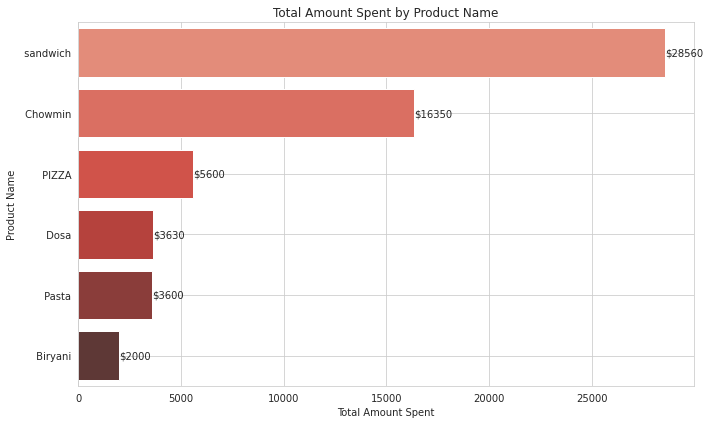

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming total_amount_by_product_type_pandas contains the data
# total_amount_by_product_type_pandas = total_amount_by_product_type.toPandas()

# Sort the DataFrame by 'Total Amount' in descending order for better visualization
total_amount_by_product_type_pandas = total_amount_by_product_type_pandas.sort_values(by='Total Amount', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount', y='Product Name', data=total_amount_by_product_type_pandas, palette="Reds_d")
plt.title('Total Amount Spent by Product Name')
plt.xlabel('Total Amount Spent')
plt.ylabel('Product Name')

# Show the total amount on the right side of the bars
for index, value in enumerate(total_amount_by_product_type_pandas['Total Amount']):
    plt.text(value, index, f'${value}', va='center')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


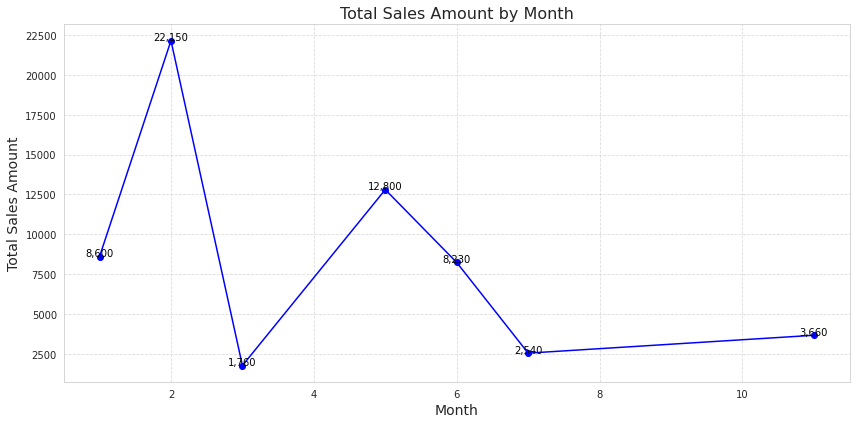

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Assuming you're using PySpark and joined_data is a DataFrame
# Calculate the total amount and add it as a new column
joined_data = joined_data.withColumn('Total Amount', F.col('Quantity') * F.col('Product Price'))

# Extract month from the date column
joined_data = joined_data.withColumn('Month', F.month('Date'))

# Group by month and sum the total amount for each group
total_amount_by_month = joined_data.groupBy('Month').agg(F.sum('Total Amount').alias('Total Sales Amount'))

# Convert PySpark DataFrame to Pandas DataFrame
total_amount_by_month_pandas = total_amount_by_month.toPandas()

# Sort the DataFrame by month
total_amount_by_month_pandas = total_amount_by_month_pandas.sort_values(by='Month')

# Set style
sns.set_style("whitegrid")

# Plot using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(total_amount_by_month_pandas['Month'], total_amount_by_month_pandas['Total Sales Amount'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.title('Total Sales Amount by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adding value labels on data points
for index, row in total_amount_by_month_pandas.iterrows():
    plt.text(row['Month'], row['Total Sales Amount'], f"{row['Total Sales Amount']:,}", color='black', ha="center", fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


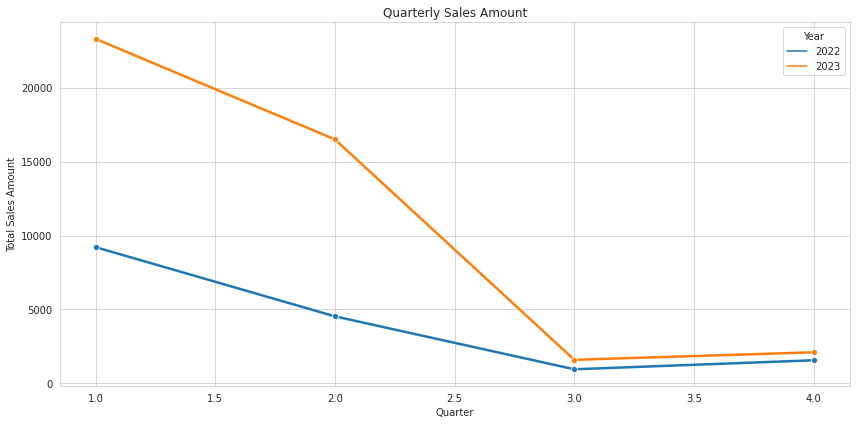

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Assuming you're using PySpark and joined_data is a DataFrame
# Calculate the total amount and add it as a new column
joined_data = joined_data.withColumn('Total Amount', F.col('Quantity') * F.col('Product Price'))

# Extract quarter and year from the date column
joined_data = joined_data.withColumn('Quarter', F.quarter('Date'))
joined_data = joined_data.withColumn('Year', F.year('Date'))

# Group by quarter and year and sum the total amount for each group
total_amount_by_quarter = joined_data.groupBy('Year', 'Quarter').agg(F.sum('Total Amount').alias('Total Sales Amount'))

# Convert PySpark DataFrame to Pandas DataFrame
total_amount_by_quarter_pandas = total_amount_by_quarter.toPandas()

# Sort the DataFrame by year and quarter
total_amount_by_quarter_pandas = total_amount_by_quarter_pandas.sort_values(by=['Year', 'Quarter'])

# Set style
sns.set_style("whitegrid")

# Plot quarterly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_amount_by_quarter_pandas, x='Quarter', y='Total Sales Amount', hue='Year', marker='o', palette='tab10', linewidth=2.5)
plt.title('Quarterly Sales Amount')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')

# Show plot
plt.tight_layout()
plt.show()


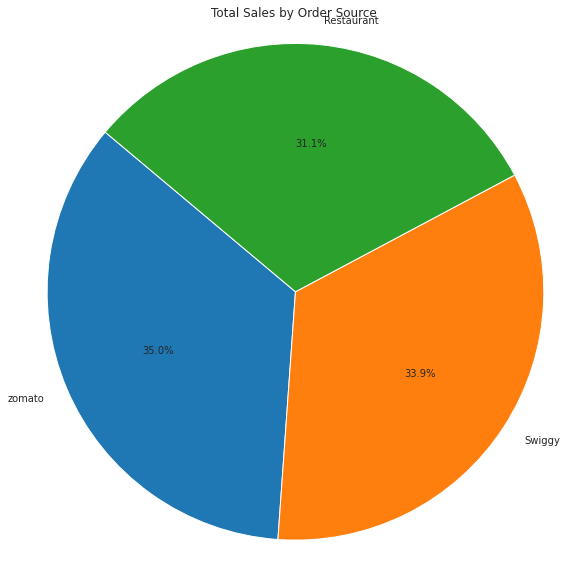

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Assuming you're using PySpark and joined_data is a DataFrame
# Calculate the total amount and add it as a new column
joined_data = joined_data.withColumn('Total Amount', F.col('Quantity') * F.col('Product Price'))

# Group by order source and sum the total amount for each group
total_sales_by_source = joined_data.groupBy('Source').agg(F.sum('Total Amount').alias('Total Sales'))

# Convert PySpark DataFrame to Pandas DataFrame
total_sales_by_source_pandas = total_sales_by_source.toPandas()

# Plot total sales by order source using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_source_pandas['Total Sales'], labels=total_sales_by_source_pandas['Source'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Order Source')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
